### Задание 

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).

Ваша задача — оценить распределение выборочного среднего вашей случайной 
величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

#### Краткая справка из Wiki
Закон смертности Гомпертца — Мейкхама (иногда просто Закон Гомпертца, Распределение Гомпертца) — статистическое распределение, которое описывает смертность человека и большинства многоплодных животных. Согласно закону Гомпертца — Мейкхама, смертность является суммой независимого от возраста компонента (члена Мейкхама) и компонента, зависимого от возраста (функция Гомпертца), который экспоненциально возрастает с возрастом и описывает старение организма. В защищённых средах, где внешние причины смерти отсутствуют (в лабораторных условиях, в зоопарках или для людей в развитых странах) независимый от возраста компонент часто становится малым, и формула упрощается до функции Гомпертца. Распределение было получено и опубликовано актуарием и математиком Бенджамином Гомпертцем в 1825 году.
##### Полезные ссылки

Из док. SciPy: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gompertz.html

Wiki: https://ru.wikipedia.org/wiki/Распределение_Гомпертца


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import gompertz
%matplotlib inline

In [4]:
# Возьмём случайный красивый на мой взгляд параметр c
c = 0.333
sample_size = 1000

Text(0.5, 0, '$x$')

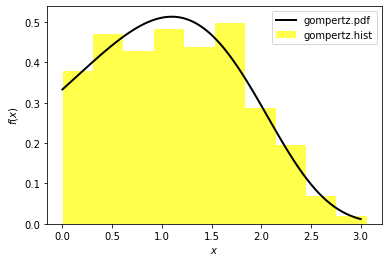

In [5]:
# Сгенерируем выборку размера 1000
# Нарисуем гистограмму выборки и поверх неё теоретическую плотность распределения 
sample = gompertz.rvs(c, size=sample_size)
plt.hist(sample, density= True, label = 'gompertz.hist', color='Yellow', alpha= 0.7)
lgr = gompertz.ppf(0.01, c)
rrg = gompertz.ppf(0.99, c)
x = np.linspace(0, 3, 100)
sample_pdf = gompertz.pdf(x, c)
plt.plot(x, sample_pdf, lw = 2, label= 'gompertz.pdf', color= 'Black')
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

In [6]:
# Рассчитаем характеристики распределения с параметром с
mux, std, dx = gompertz.mean(c), gompertz.std(c), gompertz.std(c) ** 2
print('Мат. ожидание:', round(mux, 4))
print('Среднее кв. отклонение: ', round(std, 4))
print('Дисперсия: ', round(dx, 4))

Мат. ожидание: 1.1574
Среднее кв. отклонение:  0.6661
Дисперсия:  0.4437


In [7]:
# Функция для отрисовки графиков для выборок данной длины и параметра с функции gompertz

def gomp_review(n, c):
    
    # Построим гистограммы выборки объёма n
    val = np.array([gompertz.rvs(c, size= n) for x in range(sample_size)])  
    arrofmeans = val.mean(axis= 1)
    plt.hist(arrofmeans, density=True, alpha= 0.7, color= 'Yellow', label= 'mean n hist')
    
    #построим график нормального распределения поверх гистограммы
    
    mu, sigma = mux, (dx / n) ** 0.5
    norm_rv = sts.norm(loc= mu, scale= sigma)
    x = np.linspace(0, 2.5, 1000)
    norm_pdf = norm_rv.pdf(x)
    plt.plot(x, norm_pdf, lw = 2, label= 'norm pdf for ' + str(n), color= 'Black')
    plt.legend()
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    
    # Характеристики нормального распределения
    print('Математическое ожидание нормального распределения: ', round(mu, 4))
    print('Дисперсия нормального распределения: ', round(sigma ** 2, 4))

Математическое ожидание нормального распределения:  1.1574
Дисперсия нормального распределения:  0.0887


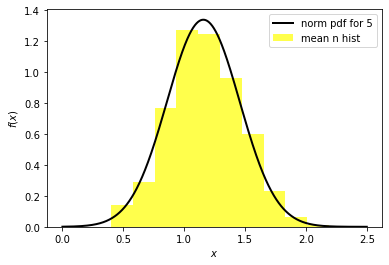

In [6]:
# Результаты для выборки размера 5
gomp_review(5, c)

Математическое ожидание нормального распределения:  1.1574
Дисперсия нормального распределения:  0.0444


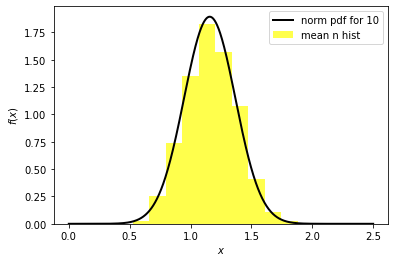

In [7]:
# Результат для выборка объёма 10
gomp_review(10, c)

Математическое ожидание нормального распределения:  1.1574
Дисперсия нормального распределения:  0.0089


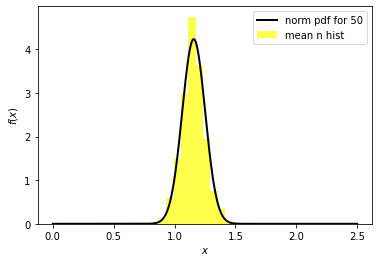

In [8]:
# Результат для выборки объёма 50
gomp_review(50, c)

Математическое ожидание нормального распределения:  1.1574
Дисперсия нормального распределения:  0.0887
Математическое ожидание нормального распределения:  1.1574
Дисперсия нормального распределения:  0.0444
Математическое ожидание нормального распределения:  1.1574
Дисперсия нормального распределения:  0.0089


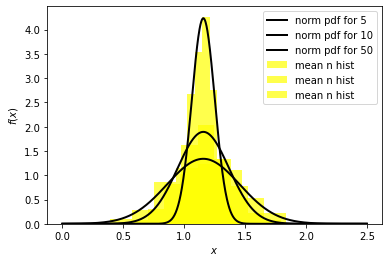

In [8]:
gomp_review(5, c)
gomp_review(10, c)
gomp_review(50, c)

### Вывод
При увеличении объёма выборок n увеличивается точность аппроксимации, для описания распределения выборочных средних для функции gompertz подходит нормальное распределение